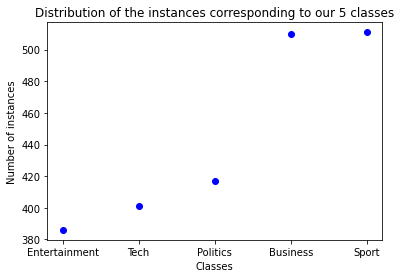

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

classes = ["Entertainment", "Tech", "Politics", "Business", "Sport"]
instances = [386, 401, 417, 510, 511]

plt.title('Distribution of the instances corresponding to our 5 classes')
plt.xlabel('Classes')
plt.ylabel('Number of instances')

myfig = plt.plot(classes,instances, 'bo')
plt.savefig("BBC-distribution.pdf")
plt.show()


In [4]:
%%capture cap 
import sklearn 
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #7c
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


newdata = load_files('BBC_dataset\BBC', encoding='latin1', load_content=True)
newdata.target_names
X_train, X_test, Y_train, Y_test = train_test_split(newdata.data, newdata.target, test_size=0.2, random_state=None)

vectorizer = CountVectorizer()

#-------------------------------------------------------------------------------------------------------------

fitObject = vectorizer.fit_transform(X_train)
fitObject_ = vectorizer.fit_transform(X_test)

# print(fitObject.shape) #will get (1780, 26986) number of documents by number of words(vocab)

Tokens1 = fitObject.toarray() #transform the training set matrix to an ndarray
Tokens2 = fitObject_.toarray()  #transform the test set matrix to array

row_sum1 = np.sum(Tokens1, axis=1) # gets the sum of rows for Tokens1 
row_sum2 = np.sum(Tokens2, axis=1)   #Gets the sum of rows for Tokens2

sumsArray1 = np.zeros(5, dtype = int) # To hold the result for training set 
sumsArray2 = np.zeros(5, dtype = int) # To hold the result for test set

for i in range((len(row_sum1))):
    index = Y_train[i]
    sumsArray1[index] += row_sum1[i]
    
for i in range((len(row_sum2))):
    index = Y_test[i]
    sumsArray2[index] += row_sum2[i]

#-----------------------------------------------------------------------------------------------------------------------
#print(fitObject.toarray()) #prints non-zero elements

tokens_array = fitObject.toarray()
tokens_array2 = fitObject_.toarray()

#FOR Question 7.g
#print(tokens_array)
counter = 0
counter0 = 0
for i,j in np.ndindex(tokens_array.shape):
    counter += 1
    if tokens_array[i,j] == 0:
        counter0 += 1

counter_x = 0
counter_y = 0
counter1_ = 0
counter1 = 0


for i,j in np.ndindex(tokens_array.shape):
    counter_x += 1
    if tokens_array[i,j] == 1:
        counter1_ += 1

for i,j in np.ndindex(tokens_array2.shape):
    counter_y += 1
    if tokens_array2[i,j] == 1:
        counter1 += 1


matrix1 = vectorizer.fit_transform(X_train)
matrix2 = vectorizer.transform(X_test)
#-----------------------------------------------------------------------------------------------------------------
mnNB = MultinomialNB() # Instantiating a Multinomial Bayes
mnNB.fit(matrix1, Y_train)
    
#My 2 FAV words with their indices: eminem: 4621 ; tennis: 12841 (retrieved by running #print(vectorizer.vocabulary_))

logprob_arr = mnNB.feature_log_prob_
#print(logprob_arr) # displays log(prob) for all features(words)

eminem_arr = logprob_arr[:, 4621] #isolate column 4621 associated with log-prob of eminem and Store it 
tennis_arr = logprob_arr[:, 12841] #isolate column 12841 associated with log-prob of tennis and Store it 

class_prob_eminem = np.zeros(5, dtype = int) # To hold the result for sum of log-probs for each class 
class_prob_tennis = np.zeros(5, dtype = int) # To hold the result for sum of log-probs for each class

for i in range((len(eminem_arr))):
    index = Y_train[i]
    class_prob_eminem[index] += eminem_arr[i]
    
for j in range((len(tennis_arr))):
    index = Y_train[j]
    class_prob_tennis[index] += tennis_arr[j]
    
#-----------------------------------------------------------------------------------------------------------
MultinomialNB()

classPredict = mnNB.predict(matrix2) #Running classifier on the test set

print('Question 7')
print('MultinomialNB Default values try 1', '\n')
print('(b)')

ConfusionMatrix = metrics.confusion_matrix(Y_test, classPredict)
print('Confusion Matrix: ')
print(ConfusionMatrix, '\n')
print('-------------------------------------------------------------------------------------')

print('(c)')
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print('\n', 'Classification Report')
print(classification_report(Y_test, classPredict, target_names=target_names))
print('-------------------------------------------------------------------------------------')

print('\n', '(d)')
Accuracy = metrics.accuracy_score(Y_test, classPredict)
MacroF1score = f1_score(Y_test, classPredict, average='macro')
WeightedF1score = f1_score(Y_test, classPredict, average='weighted')

print('Accuracy = ', Accuracy)
print('MacroF1score = ', MacroF1score)
print('WeightedF1score = ', WeightedF1score)
print('-------------------------------------------------------------')

print('(e)')
class_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print('Class names: ', class_names)
print('Prior probabilities: ')
prior_log = (mnNB.class_log_prior_)
prior = np.exp(prior_log)
print(prior)
print('-------------------------------------------------------------')

print('(f)')
print('Size of the vocabulary(for training set) is the number of columns: ', fitObject.shape)
print('**Another way to get the size of vocabulary**',mnNB.n_features_in_)  # Also gives the size of vocabulary
print('-------------------------------------------------------------')

print('(g)')
print('Number of word tokens for each class in the training set: ', sumsArray1)
print('Number of word tokens for each class in the test set: ',sumsArray2)  
class_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print('Class names: ', class_names)

print('-------------------------------------------------------------')
print('(h)')
corpusTokens = np.add(sumsArray1, sumsArray2)   
print('Number of tokens in the entire corpus for each class', corpusTokens)
print('Number of tokens in the entire corpus', np.sum(corpusTokens, axis=0))
print('-------------------------------------------------------------')
print('(i)')
print('Number of words with a frequency of zero in trainning set: ', counter0)
print('Percentage of words with a frequency of zero in trainning set:', (counter0/counter)*100, '%')
print('-------------------------------------------------------------')
print('(j)')
print('Number of words with a frequency of one in the entire corpus: ', counter1_ + counter1 )
print('Percentage of words with a frequency of one in the entire corpus:', ((counter1_ + counter1)/(counter_x + counter_y)*100), '%')    
print('-------------------------------------------------------------')
print('(k)')
#My 2 FAV words with their indices: eminem: 4621 ; tennis: 12841 (retrieved by running #print(vectorizer.vocabulary_))
print('eminem', 'Log-prob: ', eminem_arr)
print('tennis', 'Log-prob: ', tennis_arr)

with open('bbc-performance.txt', 'w') as out:
    out.write(cap.stdout)

